## Цель проекта:  построить графики: модели самолетов и количество рейсов, города и количество рейсов, топ-10 городов и количество рейсов; сделать выводы по каждому из графиков, пояснить результат.

## Изучение данных из файлов.

### Выгрузка библиотек для работы с файлами.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Открытие файлов

In [2]:
model_amount_flights = pd.read_csv('/datasets/query_1.csv')
city_average_flights = pd.read_csv('/datasets/query_3.csv')

### Изучение таблицы "model_amount_flights"

In [3]:
model_amount_flights #откроем dataframe

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


In [4]:
model_amount_flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


**В таблице "model_amount_flights" пропусков нет. Типы фалов соответствуют.**

### Изучение таблицы "city_average_flights"

In [5]:
city_average_flights.head() #откроем dataframe

,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290
3,Архангельск,5.354839
4,Астрахань,2.451613


In [6]:
city_average_flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


**В таблице "city_average_flights" пропусков нет. Типы данных соответствуют.**

### Поиск дубликатов

In [7]:
city_average_flights['city'].str.lower().duplicated().sum()

0

**Дубликатов не обнаружено.**

## Анализ графиков

**Отсортируем таблицу по среднему количеству рейсов и выведем ТОП-10 городов, с самым большим количеством рейсов в день**

In [8]:
top_flights_city = city_average_flights.sort_values(by='average_flights', ascending=False).head(10)
top_flights_city

,city,average_flights
43,Москва,129.774194
70,Санкт-Петербург,31.161290
54,Новосибирск,17.322581
33,Красноярск,11.580645
20,Екатеринбург,11.322581
67,Ростов-на-Дону,10.193548
63,Пермь,10.129032
10,Брянск,10.000000
74,Сочи,9.612903
84,Ульяновск,9.580645


**Построим графики показывающие модели самолетов и количество рейсов, города и количество рейсов, топ-10 городов и количество рейсов**

**Отсортируем таблицу количество рейсов на определенной модели самолета по убыванию.**

In [19]:
model_flights_sort = model_amount_flights.sort_values(by='flights_amount', ascending=False)

**Оптимизируем построение графиков функцией и определим размер графиков.**

In [37]:
sns.set(rc={'figure.figsize':(20,15)})
def sns_plot(data,x,y,titlename,xname, yname):
    plot = sns.barplot(data=data,x=x,y=y)
    plt.title(titlename)
    plt.xlabel(xname)
    plt.ylabel(yname)
    plt.show

### График №1. Модель самолетов и колечество рейсов.

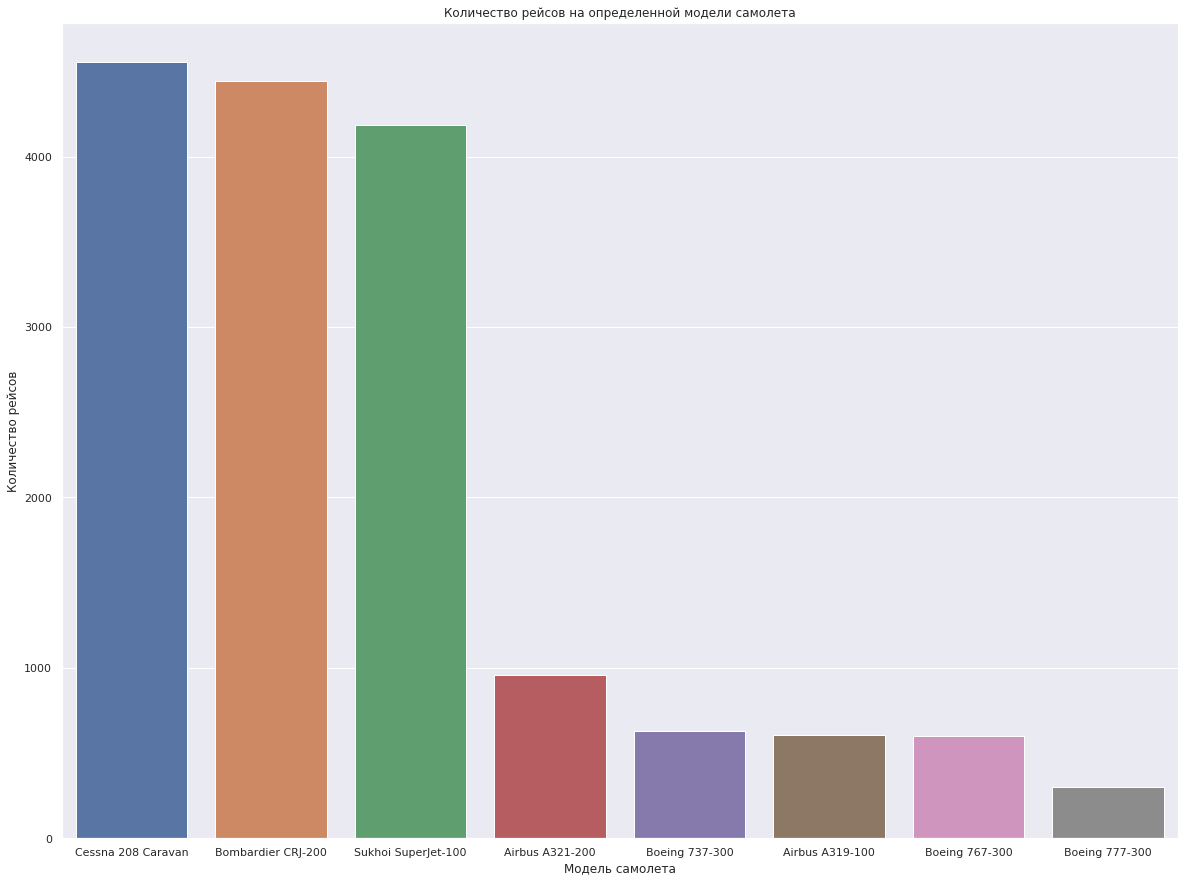

In [38]:
sns_plot(model_flights_sort, 'model', 'flights_amount', 'Количество рейсов на определенной модели самолета', 'Модель самолета', 'Количество рейсов')

**Вывод:**

На графике видим, что больше всего рейсов в сентябре 2018 года было совершно на моделях самолета "Bombardier CRJ-200", "Cessna 208 Caravan", "Sukhoi Superjet-100". Это связано с тем что на таких самолетах совершаются межрегиональные рейсы. Также на этих самолетах совершают бизнес рейсы.
Такие рейсы совершаются чаще, чем среднемагистральные рейсы. На среднемагистральные рейсы летают 'Boeing' и 'Airbus'

### График №2. ТОП-10 городов по количеству рейсов.

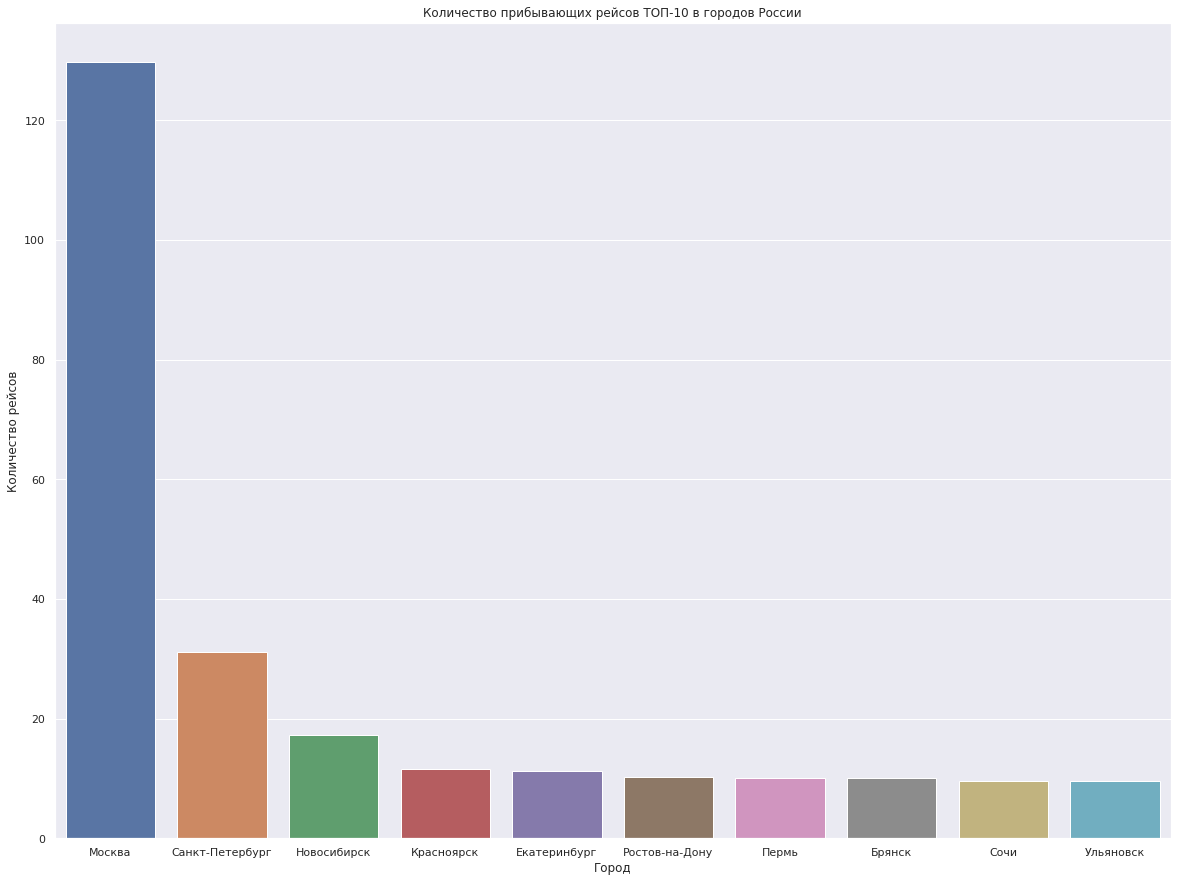

In [39]:
sns_plot(top_flights_city, 'city', 'average_flights', 'Количество прибывающих рейсов ТОП-10 в городов России', 'Город', 'Количество рейсов')

**Вывод:**

В августе 2018 года больше всего рейсов было в Москву, на втором месте Санкт-Петербург, а на третьем Новосибирск. 
Это связано с тем, что Москва по численности населения на 1-ом месте, Санкт-Петербург на втором и Новосибирск на 3-ем.и

### График №3 Количество пребывающих рейсов во всех городах.

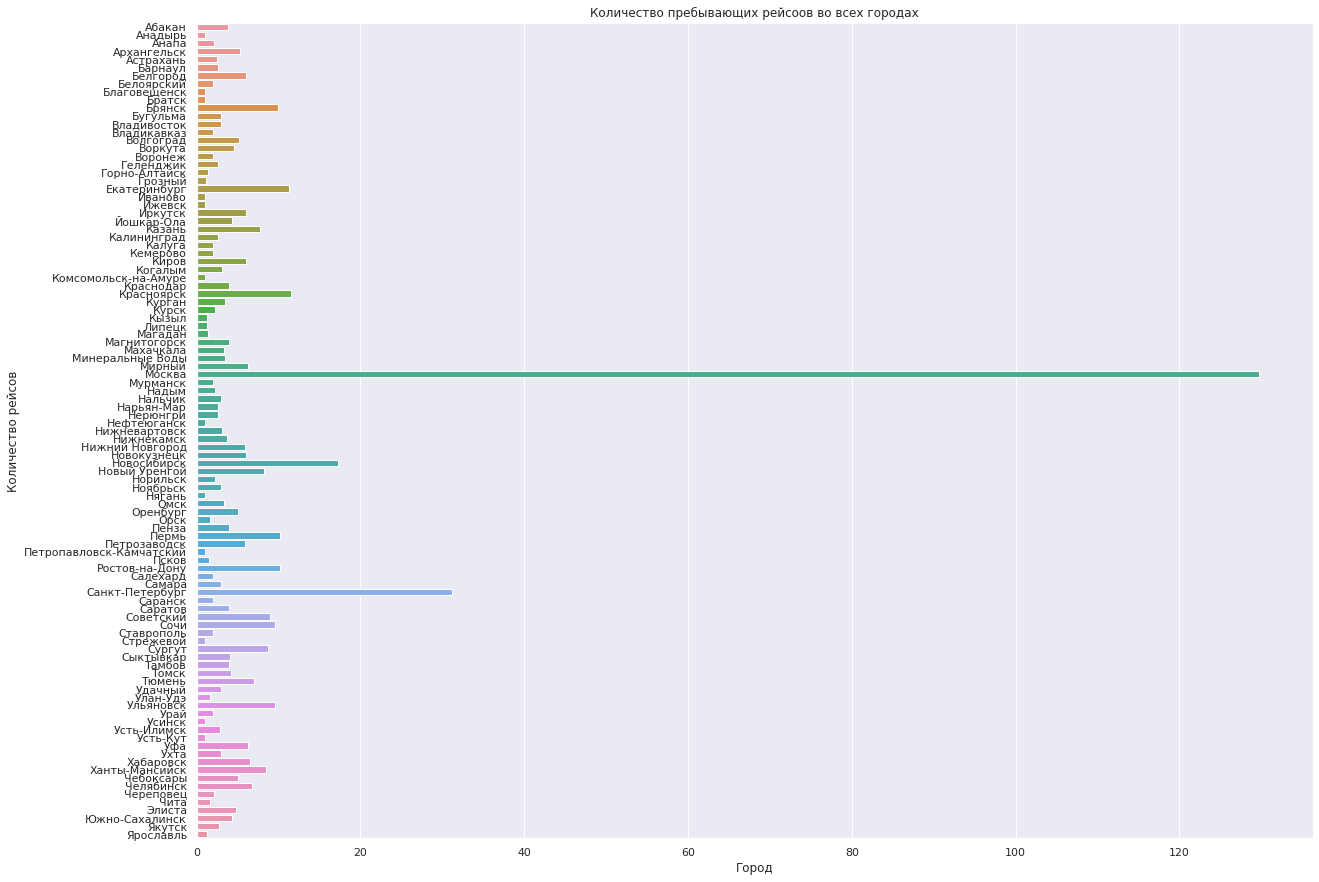

In [41]:
sns_plot(city_average_flights,'average_flights','city', 'Количество пребывающих рейсоов во всех городах', 'Город', 'Количество рейсов')

In [42]:
city_average_flights['average_flights'].median()

3.0

**Вывод:**

Как видно на графике №3 самым большим количеством прибывающих рейсов выделяются Москва, Санкт-Петербург и Новосибирск. Это связано с количеством населения в этих городах. Чем больше население тем больше будет рейсов. В Москве такое количество обуславливается не только количеством населения, но и тем что это столица России.
Среднее медианое значение среди всех городов равно 3 прибывающим рейсам за день в августе 2018 года. 

Думаю сравнивать все города друг с другом не совсем правильно. Правильнее будет сравнивать города в определенном регионе, к сожалению данных к какому региону принадлежит город у нас нет.

## Общий вывод

1. Больше всего рейсов в сентябре 2018 года было совершно на моделях самолета "Bombardier CRJ-200", "Cessna 208 Caravan", "Sukhoi Superjet-100". На этих самолетах в основном совершаются региональные рейсы и бизнес авиация что дополнительно добавляет количество рейсов.

2. В августе 2018 года больше всего рейсов было в Москву, на втором месте Санкт-Петербург, а на третьем Новосибирск. Это связано с тем, что Москва по численности населения на 1-ом месте, Санкт-Петербург на втором и Новосибирск на 3-ем.и

3. Как видно на графике №3 самым большим количеством прибывающих рейсов выделяются Москва, Санкт-Петербург и Новосибирск. Это связано с количеством населения в этих городах. Чем больше население тем больше будет рейсов. В Москве такое количество обуславливается не только количеством населения, но и тем что это столица России. Среднее медианое значение среди всех городов равно 3 прибывающим рейсам за день в августе 2018 года.

Рекомендация: добавить информацию о составе регионов. Какой город в какой регион входит, чтоб лучше проанализировать картину.